<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/GAM_sku_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygam


In [2]:

import pandas as pd
df_org = pd.read_excel('/content/Центральный федеральный округ_X5_Дискаунтер_Сыр полутвёрдый.xlsx')

In [3]:
# df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1)).dt.to_period('M')
df_org

,Month,Year,Sku_name,Analytic1,Articul8,Brand,PRICE_PER_UNIT,SALES_VOL,SHARE_VOL_PROMO,SHARE_VOL
0,1,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,757.015534,68.88,0.971298,1.486557e-04
1,2,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,767.246528,2.88,0.491319,6.279892e-06
2,3,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,999.458333,0.24,0.000000,6.005747e-07
3,1,2024,Сыр полутвёрдый Casa Margot Эмменталер Флоу-па...,150 г,Эмменталер,Casa Margot,3024.421769,14.70,0.777143,2.575605e-05
4,2,2024,Сыр полутвёрдый Casa Margot Эмменталер Флоу-па...,150 г,Эмменталер,Casa Margot,3118.870635,12.60,0.726190,2.190801e-05
...,...,...,...,...,...,...,...,...,...,...
2080,10,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,685.842388,14049.80,0.712729,2.220258e-02
2081,11,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,851.198597,3244.00,0.410310,5.385147e-03
2082,11,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,702.743684,12592.60,0.418561,2.123730e-02
2083,12,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,800.631289,8167.40,0.680883,1.545385e-02


In [4]:
def get_boost_feature_3(X,y,target,target_1):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    from sklearn.ensemble import GradientBoostingRegressor

    plt_1=plt
    plt_2=plt

    # Настроим и обучим модель Gradient Boosting Regressor
    gbr_model = GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
    # Настроим и обучим модель Gradient Boosting Regressor
    print(X)
    print(y)
    print(X.to_frame().fillna(0))
    # Обучение модели
    gbr_model.fit(X.to_frame().fillna(0), y.to_frame())


    # Для отслеживания ошибки на каждой итерации
    train_errors = []

    # Используем staged_predict для получения предсказаний на каждой итерации
    for stage in gbr_model.staged_predict(X.to_frame().fillna(0)):
        # Расчет RMSE
        rmse = np.sqrt(mean_squared_error(y, stage))
        train_errors.append(rmse)

    # Построение графика RMSE по итерациям
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_errors) + 1), train_errors, marker='o', color='blue', linestyle='-')
    plt.title('График обучения: RMSE по итерациям')
    plt.xlabel('Итерация')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.xticks(np.arange(1, len(train_errors) + 1, step=5), rotation=90)  # Настройка меток по оси X
    plt.show()

    # Предсказания для модели Gradient Boosting
    y_pred_gbr = gbr_model.predict(X.to_frame().fillna(0))

    # mean_market_shares
    # mean_org

    # market_share_before,new_df
    from sklearn.metrics import mean_absolute_error, r2_score
    # Расчет MAE

    mae = mean_absolute_error(y.values,y_pred_gbr)
    print(f'MAE: {mae:.2f}')

    # Расчет R²
    r2 = r2_score(y.values,y_pred_gbr)
    # print(f'R²: {r2:.2f}')

    # Расчет WAPE
    wape = sum(abs((y.values - y_pred_gbr)) / sum((y.values)))
    print(f'WAPE: {wape:.2f}')

    # Количество наблюдений и количество предикторов
    n = len(X)  # количество наблюдений
    p = 1  # количество предикторов (в данном случае это предсказанная доля рынка)

    # Вычисление скорректированного R²
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Вывод значений R² и R²_adj
    print(f'R²: {r2:.2f}')
    print(f'R² Adjusted: {r2_adj:.2f}')



    plt.plot(X.values,y.values, label='y_true')
    plt.plot(X.values,y_pred_gbr,label='y_pred')
    plt.legend()

    plt.show()



    # Предсказания для модели Gradient Boosting
    y_pred_gbr_target = gbr_model.predict(target.to_frame().fillna(0))

    # mean_market_shares
    # mean_org

    # market_share_before,new_df
    from sklearn.metrics import mean_absolute_error, r2_score
    # Расчет MAE

    mae = mean_absolute_error(target_1.values,y_pred_gbr_target)
    print(f'MAE: {mae:.2f}')

    # Расчет R²
    r2 = r2_score(target_1.values,y_pred_gbr_target)
    # print(f'R²: {r2:.2f}')

    # Расчет WAPE
    wape = sum(abs((target_1.values - y_pred_gbr_target)) / sum((target_1.values)))
    print(f'WAPE: {wape:.2f}')

    # Количество наблюдений и количество предикторов
    n = len(y_pred_gbr_target)  # количество наблюдений
    p = 1  # количество предикторов (в данном случае это предсказанная доля рынка)

    # Вычисление скорректированного R²
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Вывод значений R² и R²_adj
    print(f'R²: {r2:.2f}')
    print(f'R² Adjusted: {r2_adj:.2f}')



    plt_1.scatter(target.values,target_1.values, label='y_true')
    # plt.plot(X.values,y_pred_gbr_target,label='y_pred')
    plt_1.legend()
    plt_1.show()

    # plt_2.scatter(X.values,y.values, label='y_true')
    plt_2.scatter(y_pred_gbr_target,target_1.values,label='y_pred')
    plt_2.legend()
    plt_2.show()
    return y_pred_gbr_target


Название SKU с максимальным средним SHARE_VOL:
Сыр полутвёрдый Брест Литовск Монастырский Флоу-пак 200 г 45,0%
Максимальное среднее SHARE_VOL:
0.15185309834593924


<ipython-input-5-546728a3719f>:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_i]=pd.Categorical(X[cat_i]).codes
<ipython-input-5-546728a3719f>:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_i]=pd.Categorical(X[cat_i]).codes
<ipython-input-5-546728a3719f>:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     33.8142
Link Function:                     IdentityLink Log Likelihood:                               -754585.5761
Number of Samples:                          669 AIC:                                          1509240.7805
                                                AICc:                                         1509244.7188
                                                GCV:                                                0.0005
                                                Scale:                                              0.0004
                                                Pseudo R-Squared:                                   0.8198
Feature Function                  Lam

<ipython-input-5-546728a3719f>:234: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


MSE: 0.00040


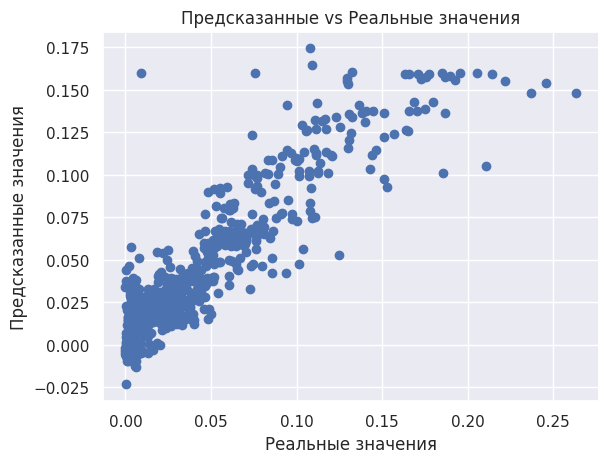

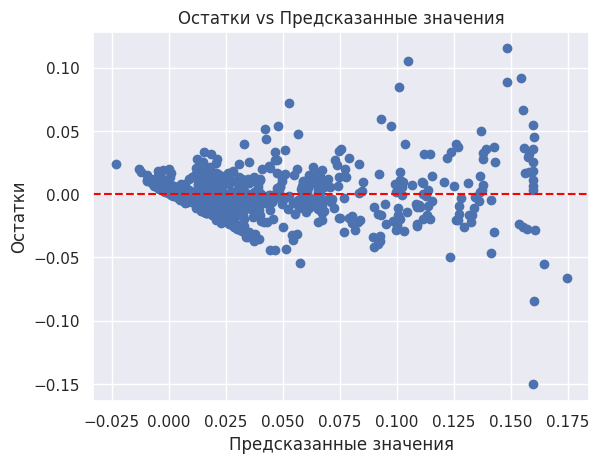

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

if 'data' in locals():
    del data
df_org_top_25 = df_org.groupby(['Sku_name'])['SALES_VOL'].sum()
sku_top_25=df_org_top_25.sort_values(ascending=False).head(25)
df_r = df_org['Sku_name'].apply(lambda x: x in sku_top_25.index.values)
data = df_org[df_r].copy()
data
data.to_excel('цфо_X5.xlsx')
# max_sku =data.sort_values(by="SHARE_VOL",ascending=False).values.tolist()
# Группируем по 'Sku_name' и находим среднее значение 'SHARE_VOL'
grouped = data.groupby('Sku_name')['SHARE_VOL'].mean().reset_index()

# Находим строку с максимальным значением 'SHARE_VOL'
max_sku = grouped.loc[grouped['SHARE_VOL'].idxmax()]

# Выводим результат
print("Название SKU с максимальным средним SHARE_VOL:")
print(max_sku['Sku_name'])
print("Максимальное среднее SHARE_VOL:")
print(max_sku['SHARE_VOL'])

if 2024 in data['Year'].unique().tolist():
  year_search=2024

else:
  year_search=2023

# del model_data
# del prediction_data

sns.set(style='darkgrid')

# Переименуем столбцы для удобства
data.rename(columns={
    'Month': 'month',
    'Year': 'year',
    'Sku_name': 'SKU',
    'Analytic1': 'Package_Info',
    'Articul8': 'Cheese_Type',
    'Brand': 'Brand',
    'PRICE_PER_UNIT': 'price_per_unit',
    'SALES_VOL': 'sales_volume',
    'SHARE_VOL_PROMO': 'promo_share',
    'SHARE_VOL': 'market_share_observed'
}, inplace=True)


# Создаем переменную 'period' на основе года и месяца
data['period'] = data['year'].astype(str) + '_' + data['month'].astype(str)
# Присваиваем уникальный номер каждому периоду
data['period'] = data['period'].astype('category').cat.codes + 1
# Функция для извлечения веса из строки
def extract_weight(package_info):
    import re
    match = re.search(r'(\d+)\s*г', package_info)
    if match:
        return int(match.group(1))
    else:
        return np.nan

# Применение функции к столбцу 'Package_Info'
data['Package_Weight'] = data['Package_Info'].apply(extract_weight)
# # Вычисляем среднюю цену по всем SKU
# mean_price = data['price_per_unit'].mean()
# # Вычисляем индекс цены относительно средней цены
# data['price_index'] = data['price_per_unit'] / mean_price

# price_median = data['price_per_unit'].median()
# data['price_index'] = data['price_per_unit'] / price_median

# promo_share_median = data['promo_share'].median()
# data['promo_share_index'] = data['promo_share'] / promo_share_median

# # Вычисляем квадрат индекса цены
# # data['price_index_sq'] = data['price_index'] ** 2


# bins = pd.cut(data['price_index'], bins=10)

# # Группируем по бинам и суммируем значение sales_volume
# sum_sales_vol= data.groupby(bins)['sales_volume'].sum()
# mean_price = data.groupby(bins)['price_index'].mean()
# print(mean_price,'fffff')

# data['price_index_sq']=get_boost_feature_3(X=mean_price,y=sum_sales_vol,target=data['price_index'],target_1=data['sales_volume'])

# # Разбиваем данные по 20 интервалам (бинам) на основе price_index
# bins_promo_share = pd.cut(data['promo_share_index'], bins=10)

# # Группируем по бинам и суммируем значение sales_volume
# sum_sales_vol= data.groupby(bins_promo_share)['sales_volume'].sum()
# mean_promo_share = data.groupby(bins_promo_share)['promo_share_index'].mean()
# print(mean_promo_share,'qqqq')

# data['promo_share_index_sq']=get_boost_feature_3(X=mean_promo_share,y=sum_sales_vol,target=data['promo_share_index'],target_1=data['sales_volume'])


res_data = data.copy()
# Предполагая, что у вас есть DataFrame sku_df с колонкой 'Brand'

# Получаем список уникальных брендов
unique_brands = data['Brand'].unique()

# Автоматически присваиваем ASC значения каждому бренду
# Здесь мы используем функцию enumerate для присвоения уникального числа каждому бренду
asc_values = {brand: idx for idx, brand in enumerate(unique_brands)}

# Применяем присвоенные ASC к DataFrame
data['ASC'] = data['Brand'].map(asc_values)


# original_data = data.copy()

# data_test =data[data['year']>=2024].copy()
# data =data[data['year']<2024].copy()

# Заполняем пропущенные значения или удаляем строки с пропущенными значениями
data.dropna(inplace=True)

# Вычисляем общий объем продаж в каждом периоде
data['total_sales_volume'] = data.groupby('period')['sales_volume'].transform('sum')

# Вычисляем долю рынка для каждого SKU в каждом периоде
data['market_share'] = data['sales_volume'] / data['total_sales_volume']
# base_sku = 'Сыр полутвёрдый Брест Литовск Монастырский Флоу-пак 200 г 45,0%'

# base_sku ='Сыр полутвёрдый Эконива Гауда Флоу-пак 160 г 45,0%'
# # base_sku =max_sku[0][2]
# base_sku =max_sku['Sku_name']
# # base_sku='Сыр полутвёрдый Сыробогатов Королевский стандарт Топленое молоко Флоу-пак 180 г 40,0%'
# print(f'Базовая ску  {base_sku}')

# if base_sku not in data['SKU'].unique():
#     raise ValueError(f"Базовый SKU '{base_sku}' не найден в данных.")

# # Данные базового SKU
# base_data = data[data['SKU'] == base_sku][['period', 'market_share']].rename(columns={'market_share': 'base_market_share'})

# # Объединяем с основной таблицей
# data = pd.merge(data, base_data, on='period', how='left')

# # Удаляем строки, где нет данных базового SKU
# data.dropna(subset=['base_market_share'], inplace=True)
# data['log_share_ratio'] = np.log(data['market_share'] / data['base_market_share'])
# # Кодируем 'Cheese_Type' и 'Brand' с помощью One-Hot Encoding
# data = pd.get_dummies(data, columns=['Cheese_Type', 'Brand'], drop_first=True)
# characteristics = [
#     'price_index', 'price_index_sq', 'promo_share_index','promo_share_index_sq','Package_Weight', 'ASC'
# ] + \
# [data_col for data_col in data.columns if data_col.startswith('Cheese_Type_') or data_col.startswith('Brand_')]
# # Кодируем категориальные переменные (Cheese_Type и Brand)
# # df['Cheese_Type'] = df['Articul8']  # Используем 'Articul8' как тип сыра
# # df = pd.get_dummies(df, columns=['Cheese_Type', 'Brand'], drop_first=True)
# # # Преобразование bool переменных в int (0 или 1)
# for col in data.columns:
#     if data[col].dtype == bool:
#         data[col] = data[col].astype(int)

# # Данные характеристик базового SKU
# base_characteristics = data[data['SKU'] == base_sku][['period'] + characteristics]
# base_characteristics = base_characteristics.rename(columns=lambda x: 'base_' + x if x != 'period' else x)

# # Объединяем базовые характеристики с основной таблицей
# data = pd.merge(data, base_characteristics, on='period', how='left', suffixes=('', '_base'))

# # Вычисляем разности характеристик
# for char in characteristics:
#     data['delta_' + char] = data[char] - data['base_' + char]


# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# # scaler = MinMaxScaler()
# scaler = StandardScaler()

# # Applying normalization to the selected columns
# normalized_data = pd.DataFrame(scaler.fit_transform(data[['delta_price_index', 'delta_price_index_sq','delta_promo_share_index','delta_promo_share_index_sq', 'delta_Package_Weight', 'delta_ASC']]), columns=['delta_price_index', 'delta_price_index_sq','delta_promo_share_index','delta_promo_share_index_sq', 'delta_Package_Weight', 'delta_ASC'])
# del_data = data.drop(['delta_price_index', 'delta_price_index_sq','delta_promo_share_index','delta_promo_share_index_sq', 'delta_Package_Weight', 'delta_ASC'],axis=1).reset_index(drop=True)
# data=del_data.join(normalized_data)

data_test =data[data['year']<=2025].copy()
data =data[data['year']<=2025].copy()
# Установка случайного seed для воспроизводимости
# np.random.seed(42)

# # Случайное перемешивание индексов DataFrame
# indices = np.random.permutation(data.index)



# # Разделение индексов на тренировочные и тестовые
# split_point = int(0.8 * len(data))  # 80% тренировочных данных, 20% тестовых
# train_indices = indices[:split_point]


# # Разделение DataFrame на тренировочные и тестовые данные
# data_train = data.loc[train_indices]

# data_test = data[~data.index.isin(data_train.index)]
# data = data_train.copy()

# model_data = data[data['SKU'] != base_sku].copy()


# X_columns = ['delta_' + char for char in characteristics]

y = data['market_share']
X =  data[['Package_Info', 'Cheese_Type', 'Brand','ASC','price_per_unit']]


# Преобразуем категориальную переменную в числовую
for cat_i in ['Package_Info', 'Cheese_Type', 'Brand','ASC']:
    X[cat_i]=pd.Categorical(X[cat_i]).codes

from pygam import LinearGAM, s, f

gam = LinearGAM(f(0) + f(1) + f(2) + f(3) + s(4)).fit(X, y)
# Кросс-валидация для подбора гиперпараметров
# lam_values = np.logspace(-3, 3, 11)
# gam = LinearGAM(f(0) + f(1) + f(2) + f(3) + s(4)).gridsearch(X, y, lam=lam_values)


# Предсказания
y_pred = gam.predict(X)
data['pred_market_share']=y_pred

# Визуализация
gam.summary()
# Коэффициент детерминации (R²)
r2 = gam.score(X, y)
print(f'R²: {r2:.3f}')
from sklearn.metrics import mean_squared_error

# Рассчитываем MSE
mse = mean_squared_error(y.values, y_pred)
print(f'MSE: {mse:.5f}')
import matplotlib.pyplot as plt

# Визуализация предсказанных и реальных значений
plt.scatter(y, y_pred)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные vs Реальные значения')
plt.show()

# Визуализация остатков (errors)
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()



# # Y.to_excel('Y.xlsx')
# variables = X_columns.copy()
# iteration = 1

# while True:
#     X = model_data[variables]
#     # X = sm.add_constant(X)
#     model = sm.OLS(Y, X).fit()
#     # print(model.summary())
#     # if [i for i in model.pvalues.index if i=='const']:
#     # if model.pvalues.index[0]=='const':
#       # print('fffff')
#       # pvalues = model.pvalues.drop('const')
#     # else:

#     #   pvalues = model.pvalues
#     pvalues = model.pvalues

#     max_pvalue = pvalues.max()
#     if max_pvalue > 0.05:
#         variable_to_remove = pvalues.idxmax()
#         print(f"Итерация {iteration}: удаляем '{variable_to_remove}' с p-значением {max_pvalue:.4f}")

#         variables.remove(variable_to_remove)
#         iteration += 1

#     else:
#         print("Все оставшиеся признаки значимы (p < 0.05).")
#         break

# # Выводим результаты финальной модели
# print("\nРезультаты финальной модели:")
# print(model.summary())



# 5: Прогнозирование долей рынка до исключения SKU_5

# prediction_data = data_test.copy()

# prediction_data['market_share'] = prediction_data.groupby('period')['sales_volume'].transform(lambda x: x / x.sum())
# prediction_data = pd.get_dummies(prediction_data, columns=['Cheese_Type', 'Brand'], drop_first=True)

# # Объединяем базовые характеристики с данными
# base_characteristics = data_test[data_test['SKU'] == base_sku][['period'] + ['base_' + char for char in characteristics]]


# prediction_data = pd.merge(prediction_data, base_characteristics, on='period')


# # Убедимся, что все необходимые столбцы присутствуют
# all_columns = set(['delta_' + char for char in characteristics])
# missing_cols = all_columns - set(prediction_data.columns)
# for col in missing_cols:
#     prediction_data[col] = 0.0  # Используем тип float

# # Вычисляем разности характеристик
# for char in characteristics:
#     prediction_data[char] = prediction_data[char].astype(float)
#     prediction_data['base_' + char] = prediction_data['base_' + char].astype(float)
#     prediction_data['delta_' + char] = prediction_data[char] - prediction_data['base_' + char]

# X_pred = prediction_data[variables]

# # X_pred = sm.add_constant(X_pred, has_constant='add')

# # Прогнозируем систематическую утилиту
# prediction_data['V'] = model.predict(X_pred)



# # Устанавливаем V = 0 для базовой SKU
# prediction_data.loc[prediction_data['SKU'] == base_sku, 'V'] = 0
# prediction_data['exp_V'] = np.exp(prediction_data['V'])

# prediction_data = prediction_data.groupby('period').apply(lambda x: x.assign(pred_market_share=x['exp_V'] / x['exp_V'].sum())).reset_index(drop=True)

# pred_market_share_before = prediction_data[['period', 'SKU', 'pred_market_share']]
# pred_market_share_before.to_excel('pred_market_share_before.xlsx')

# # Шаг 6: Исключение SKU_5 и прогнозирование долей рынка после исключения

# sku_to_exclude = max_sku[10][2]  # Замените на фактическое название SKU, который хотите исключить
# prediction_data_after = prediction_data[prediction_data['SKU'] != sku_to_exclude].copy()
# prediction_data_after = prediction_data_after.groupby('period').apply(lambda x: x.assign(pred_market_share=x['exp_V'] / x['exp_V'].sum())).reset_index(drop=True)

# # Шаг 7: Анализ результатов и визуализация

# comparison = pd.merge(pred_market_share_before, prediction_data_after[['period', 'SKU', 'pred_market_share']], on=['period', 'SKU'], how='outer', suffixes=('_before', '_after'))
# comparison['pred_market_share_after'] = comparison['pred_market_share_after'].fillna(0)
# comparison['market_share_change'] = comparison['pred_market_share_after'] - comparison['pred_market_share_before']
# mean_changes = comparison.groupby('SKU')['market_share_change'].mean().reset_index()
# mean_changes = mean_changes.sort_values('market_share_change', ascending=False)
# print("\nСреднее изменение прогнозируемых долей рынка после исключения SKU_5:")
# print(mean_changes)

# Визуализация изменений долей рынка
# plt.figure(figsize=(12, 6))
# for sku in data['SKU'].unique():
#     sku_data = comparison[comparison['SKU'] == sku]
#     if sku != sku_to_exclude:
#         plt.plot(sku_data['period'], sku_data['market_share_change'], marker='o', label=sku)
#     else:
#         plt.plot(sku_data['period'], -sku_data['pred_market_share_before'], marker='x', linestyle='--', label=sku)
# plt.xlabel('Период')
# plt.ylabel('Изменение прогнозируемой доли рынка')
# plt.title(f'Изменение прогнозируемой доли рынка по SKU после исключения {sku_to_exclude}')
# # plt.legend()
# plt.show()



In [6]:
true_pred =data.groupby('SKU')['pred_market_share'].mean()
true_pred

,pred_market_share
SKU,
"Сыр полутвёрдый Cheese House Гауда Флоу-пак 180 г 20,0%",0.013918
"Сыр полутвёрдый LAPLANDIA Сливочный б/лакт Флоу-пак 200 г 45,0%",0.008224
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.011065
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.011970
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.026630
"Сыр полутвёрдый Богдаша Сливочный Флоу-пак 200 г 45,0%",0.010676
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.109779
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.044312
"Сыр полутвёрдый Брест Литовск Маасдам Флоу-пак 200 г 45,0%",0.044390


In [7]:
mean_org = pd.DataFrame()
mean_org['org_market_share'] = data.groupby('SKU')['market_share'].mean()
mean_org['org_market_share']

,org_market_share
SKU,
"Сыр полутвёрдый Cheese House Гауда Флоу-пак 180 г 20,0%",0.013556
"Сыр полутвёрдый LAPLANDIA Сливочный б/лакт Флоу-пак 200 г 45,0%",0.007993
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.011326
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.012244
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.026047
"Сыр полутвёрдый Богдаша Сливочный Флоу-пак 200 г 45,0%",0.010333
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.110920
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.042070
"Сыр полутвёрдый Брест Литовск Маасдам Флоу-пак 200 г 45,0%",0.043749


In [8]:
data

,month,year,SKU,Package_Info,Cheese_Type,Brand,price_per_unit,sales_volume,promo_share,market_share_observed,period,Package_Weight,ASC,total_sales_volume,market_share,pred_market_share
40,1,2022,Сыр полутвёрдый Cheese House Гауда Флоу-пак 18...,180 г,Гауда,Cheese House,733.371208,203.04,0.352261,0.000438,1,180,0,374307.64,0.000542,0.001963
41,1,2023,Сыр полутвёрдый Cheese House Гауда Флоу-пак 18...,180 г,Гауда,Cheese House,617.530714,4963.50,0.733761,0.010866,13,180,0,436936.03,0.011360,0.020842
42,1,2024,Сыр полутвёрдый Cheese House Гауда Флоу-пак 18...,180 г,Гауда,Cheese House,630.556730,7907.04,0.720103,0.013854,25,180,0,540171.00,0.014638,0.020151
43,2,2022,Сыр полутвёрдый Cheese House Гауда Флоу-пак 18...,180 г,Гауда,Cheese House,621.556729,247.14,0.659994,0.000539,5,180,0,370548.72,0.000667,0.020700
44,2,2023,Сыр полутвёрдый Cheese House Гауда Флоу-пак 18...,180 г,Гауда,Cheese House,624.786691,4839.12,0.719032,0.011024,17,180,0,416387.46,0.011622,0.020539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,10,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,685.842388,14049.80,0.712729,0.022203,14,200,8,614148.32,0.022877,0.032362
2081,11,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,851.198597,3244.00,0.410310,0.005385,3,200,8,582624.62,0.005568,0.006598
2082,11,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,702.743684,12592.60,0.418561,0.021237,15,200,8,566392.99,0.022233,0.028638
2083,12,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,800.631289,8167.40,0.680883,0.015454,4,200,8,508557.31,0.016060,0.015611


In [9]:
mean_yyyyy = pd.DataFrame()
mean_yyyyy['org_market_share'] = data.groupby('SKU')['market_share_observed'].mean()
mean_yyyyy.sum()

,0
org_market_share,1.026413


In [10]:
# mean_market_shares
# mean_org

# market_share_before,new_df
from sklearn.metrics import mean_absolute_error, r2_score
# Расчет MAE
mae = mean_absolute_error(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
print(f'MAE: {mae:.2f}')

# Расчет R²
r2 = r2_score(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
# print(f'R²: {r2:.2f}')

# Расчет WAPE
wape = sum(abs(mean_org['org_market_share'].values - true_pred.to_frame()['pred_market_share'].values) / sum(mean_org['org_market_share'].values))
print(f'WAPE: {wape:.2f}')

# Количество наблюдений и количество предикторов
n = len(mean_org)  # количество наблюдений
p = 1  # количество предикторов (в данном случае это предсказанная доля рынка)

# Вычисление скорректированного R²
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Вывод значений R² и R²_adj
print(f'R²: {r2:.2f}')
print(f'R² Adjusted: {r2_adj:.2f}')

MAE: 0.00
WAPE: 0.02
R²: 1.00
R² Adjusted: 1.00


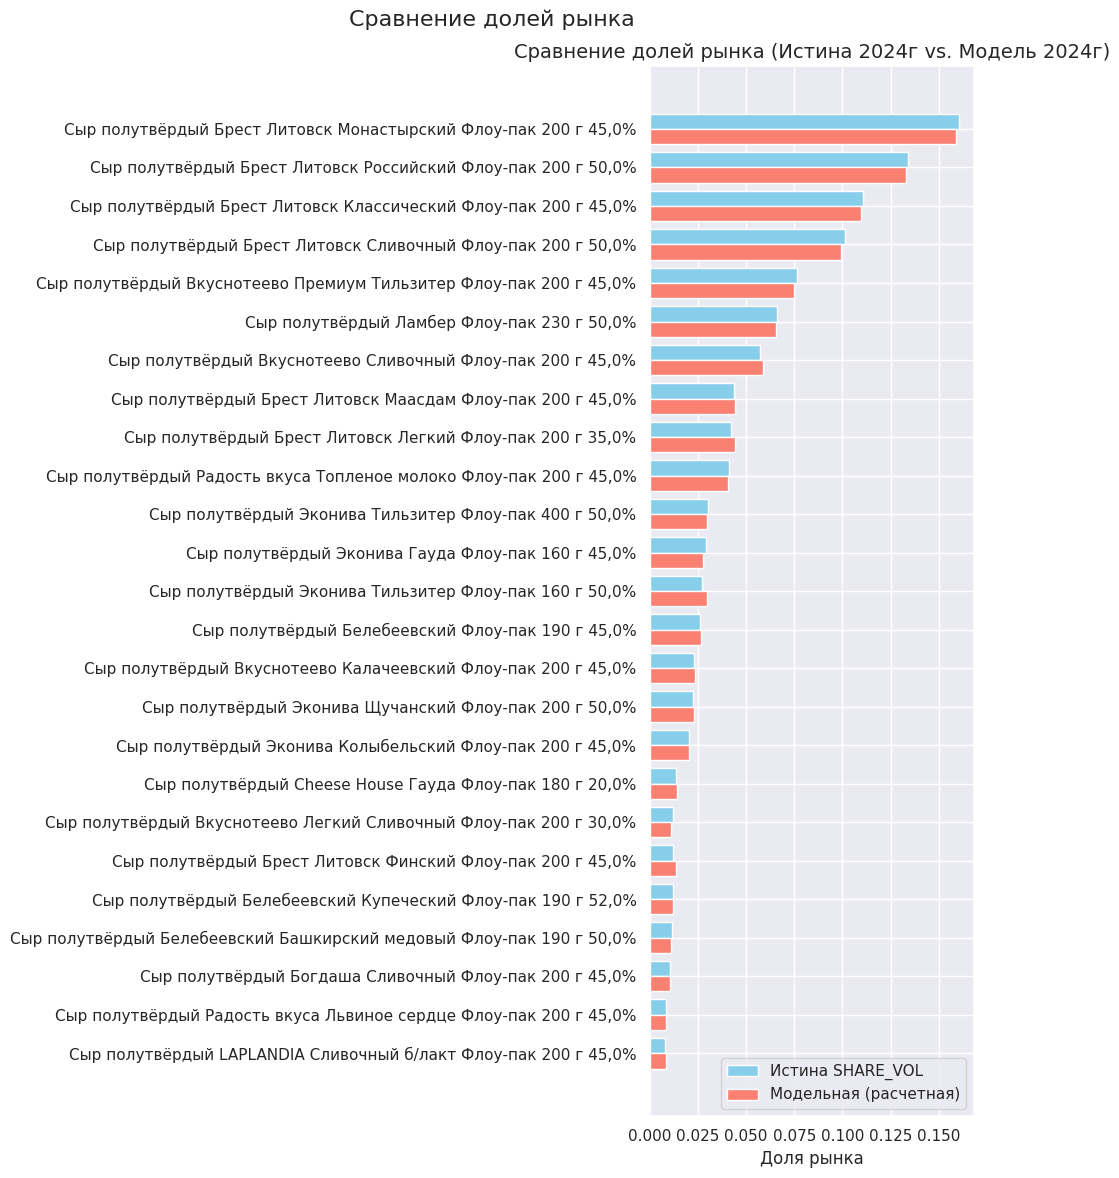

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='Истина SHARE_VOL')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='Модельная (расчетная)')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('Доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Извлечение данных для построения диаграмм
sizes_org = mean_org['org_market_share'].values
sizes_pred = true_pred.to_frame()['pred_market_share'].values
labels_org = mean_org.index.values

# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices]
sizes_pred_sorted = sizes_pred[sorted_indices]
labels_org_sorted = labels_org[sorted_indices]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 12))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, 'Сравнение долей рынка (Истина 2024г vs. Модель 2024г)', min_share=0.0)

# Общий заголовок
plt.suptitle('Сравнение долей рынка', fontsize=16)
plt.tight_layout()
plt.show()
